# Introduction to Cluster Analysis!
## Content:

1. Data preprocessing: data cleaning and transformation.
2. Preliminary cluster analysis: dendrograms and elbow plots.
3. Clustering with different scenarios.
4. Calculation of clustering metrics: analysis and inference of groups using Davies-Bouldin and Silhouette coefficients.
5. Comparative plos and visualize scenarios.

# Cloning the ML Course repository from GV-Americas

**!git clone** downloads the repository with all notebooks and files inside it and creates a copy in the current directory.

**sys** allows you to import modules within it: **plotting_gv**!

In [1]:
# Downloads dataset from GitHub
!curl -o phosphate_assay_sampled_geomet.csv https://raw.githubusercontent.com/gv-americas/ml_course_americas/main/phosphate_assay_sampled_geomet.csv

# If you are in a Google Colab session, make sure to also download the GeoVariances module for plotting!
# !curl -o plotting_gv.py https://raw.githubusercontent.com/gv-americas/ml_course_americas/main/plotting_gv.py

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  3  382k    3 12339    0     0  18343      0  0:00:21 --:--:--  0:00:21 18361
100  382k  100  382k    0     0   455k      0 --:--:-- --:--:-- --:--:--  455k


## Importing four libraries:

**Pandas**: used for data manipulation and analysis.

**Numpy**: used for scientific computing and working with arrays.

**Matplotlib**: used for data visualization and creating plots.

**Plotting_gv**: a custom plotting library created by GV Americas, which contains additional plotting functions and custom styles.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotting_gv as gv

# Reading data with Pandas

In [3]:
data = pd.read_csv('phosphate_assay_sampled_geomet.csv')
data

,Name,X,Y,Z,Depth From,Depth To,Length,AL2O3,ALT,BAO,CAO,Consumo_coletor_(g/t),FE2O3,MASSA_T,MGO,NB2O5,P2O5,SIO2,TIO2
0,DH1,2634.56,1816.84,407.75,0.00,5.00,5.00,32.33,ALT1,0.16,0.16,716.00,17.50,13.35,0.10,0.07,1.06,18.65,4.55
1,DH1,2634.56,1816.84,402.75,5.00,10.00,5.00,30.17,ALT1,0.20,0.20,716.00,16.63,13.21,0.11,0.06,1.29,23.69,4.19
2,DH1,2634.56,1816.84,397.75,10.00,15.00,5.00,28.39,ALT1,0.26,0.24,722.50,15.84,13.20,0.12,0.06,1.60,28.66,3.86
3,DH1,2634.56,1816.84,392.75,15.00,20.00,5.00,28.05,ALT1,0.29,0.30,722.50,15.87,13.20,0.13,0.06,1.82,28.62,3.92
4,DH1,2634.56,1816.84,387.75,20.00,25.00,5.00,26.02,ALT1,0.42,0.42,724.75,17.88,13.16,0.17,0.09,2.45,26.02,4.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3679,DH94,4013.90,2298.57,329.69,102.00,104.85,2.85,3.63,ALT4,0.27,16.93,708.25,11.95,13.33,12.64,0.12,3.63,28.84,4.49
3680,DH94,4013.90,2298.57,325.76,104.85,109.85,5.00,3.50,ALT5,0.21,20.07,710.00,14.01,13.38,10.41,0.04,4.63,29.69,5.25
3681,DH94,4013.90,2298.57,320.76,109.85,114.85,5.00,2.54,ALT5,0.25,20.64,698.50,16.02,13.38,9.41,0.06,4.21,28.07,5.76
3682,DH94,4013.90,2298.57,315.76,114.85,119.85,5.00,2.84,ALT5,0.33,19.89,722.00,13.82,13.38,8.22,0.05,3.86,26.07,4.49


# Recognizing data: display first few rows of our dataframe

In [4]:
data.head(5)

,Name,X,Y,Z,Depth From,Depth To,Length,AL2O3,ALT,BAO,CAO,Consumo_coletor_(g/t),FE2O3,MASSA_T,MGO,NB2O5,P2O5,SIO2,TIO2
0,DH1,2634.56,1816.84,407.75,0.0,5.0,5.0,32.33,ALT1,0.16,0.16,716.00,17.50,13.35,0.10,0.07,1.06,18.65,4.55
1,DH1,2634.56,1816.84,402.75,5.0,10.0,5.0,30.17,ALT1,0.20,0.20,716.00,16.63,13.21,0.11,0.06,1.29,23.69,4.19
2,DH1,2634.56,1816.84,397.75,10.0,15.0,5.0,28.39,ALT1,0.26,0.24,722.50,15.84,13.20,0.12,0.06,1.60,28.66,3.86
3,DH1,2634.56,1816.84,392.75,15.0,20.0,5.0,28.05,ALT1,0.29,0.30,722.50,15.87,13.20,0.13,0.06,1.82,28.62,3.92
4,DH1,2634.56,1816.84,387.75,20.0,25.0,5.0,26.02,ALT1,0.42,0.42,724.75,17.88,13.16,0.17,0.09,2.45,26.02,4.94


# Printing dataframe columns

In [5]:
data.columns

Index(['Name', 'X', 'Y', 'Z', 'Depth From', 'Depth To', 'Length', 'AL2O3',
       'ALT', 'BAO', 'CAO', 'Consumo_coletor_(g/t)', 'FE2O3', 'MASSA_T', 'MGO',
       'NB2O5', 'P2O5', 'SIO2', 'TIO2'],
      dtype='object')

# Declaring variables to filter data

In [6]:
coords = ['X', 'Y', 'Z']

cat_var = ['ALT']

variables =  ['AL2O3', 'BAO', 'CAO', 'FE2O3', 'MGO', 'NB2O5', 'P2O5', 'SIO2', 'TIO2']

# Data preprocessing analysis: cleaning and processing





# Counting NaN values

In [7]:
print('Counting NaN values for each variable:')
print(data[variables].isnull().sum())

Counting NaN values for each variable:
AL2O3     0
BAO      40
CAO       0
FE2O3     0
MGO       0
NB2O5     0
P2O5      0
SIO2     30
TIO2     20
dtype: int64


# Descriptive statistics: full dataset

In [8]:
print('Full Data statistics:\n')
data[variables].describe().round(2)

Full Data statistics:



,AL2O3,BAO,CAO,FE2O3,MGO,NB2O5,P2O5,SIO2,TIO2
count,3684.00,3644.00,3684.00,3684.00,3684.00,3684.00,3684.00,3654.00,3664.00
mean,11.13,0.41,8.90,24.93,3.53,0.14,4.97,19.90,7.80
std,11.01,0.44,8.74,11.64,3.90,0.10,3.27,8.98,4.81
min,0.01,0.01,0.04,1.55,0.03,0.00,0.24,0.26,0.21
25%,2.58,0.15,0.42,16.41,0.17,0.07,2.63,13.09,4.55
50%,5.57,0.27,8.00,21.17,1.40,0.11,4.20,21.06,6.28
75%,20.51,0.53,17.06,30.09,6.84,0.18,6.65,26.72,9.65
max,38.47,5.38,46.76,84.27,18.49,1.47,22.38,54.03,36.90


# Clean dataframe with dataframe.dropna()





In [9]:
data0 = data.dropna(subset=variables)

# Descriptive statistics: cleaned dataset

In [10]:
print('Cleaned Data statistics:\n')
data0[variables].describe().round(2)

Cleaned Data statistics:



,AL2O3,BAO,CAO,FE2O3,MGO,NB2O5,P2O5,SIO2,TIO2
count,3595.00,3595.00,3595.00,3595.00,3595.00,3595.00,3595.00,3595.00,3595.00
mean,11.17,0.41,8.88,24.94,3.53,0.14,4.96,19.88,7.80
std,11.04,0.44,8.74,11.64,3.91,0.10,3.27,8.97,4.81
min,0.01,0.01,0.04,1.55,0.03,0.00,0.24,0.26,0.21
25%,2.59,0.15,0.42,16.40,0.17,0.07,2.63,13.10,4.55
50%,5.58,0.27,7.86,21.19,1.36,0.11,4.19,21.03,6.28
75%,20.76,0.53,17.02,30.09,6.83,0.18,6.65,26.69,9.67
max,38.47,5.38,46.76,84.27,18.49,1.47,22.38,54.03,36.90


# Data transformation: StandardScaler() using Sklearn.preprocessing

$$ z = \frac{x-\mu}{\sigma}$$

Where $\mu$ is the mean of the training samples, and $\sigma$ is the standard deviation of the samples.

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [11]:
from sklearn.preprocessing import StandardScaler

x = data0[variables]

x_std = StandardScaler().fit(x).transform(x)

# Preliminary cluster analysis: dendogram and elbow plot

# Dendogram using scipy.cluster.dendogram

https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html

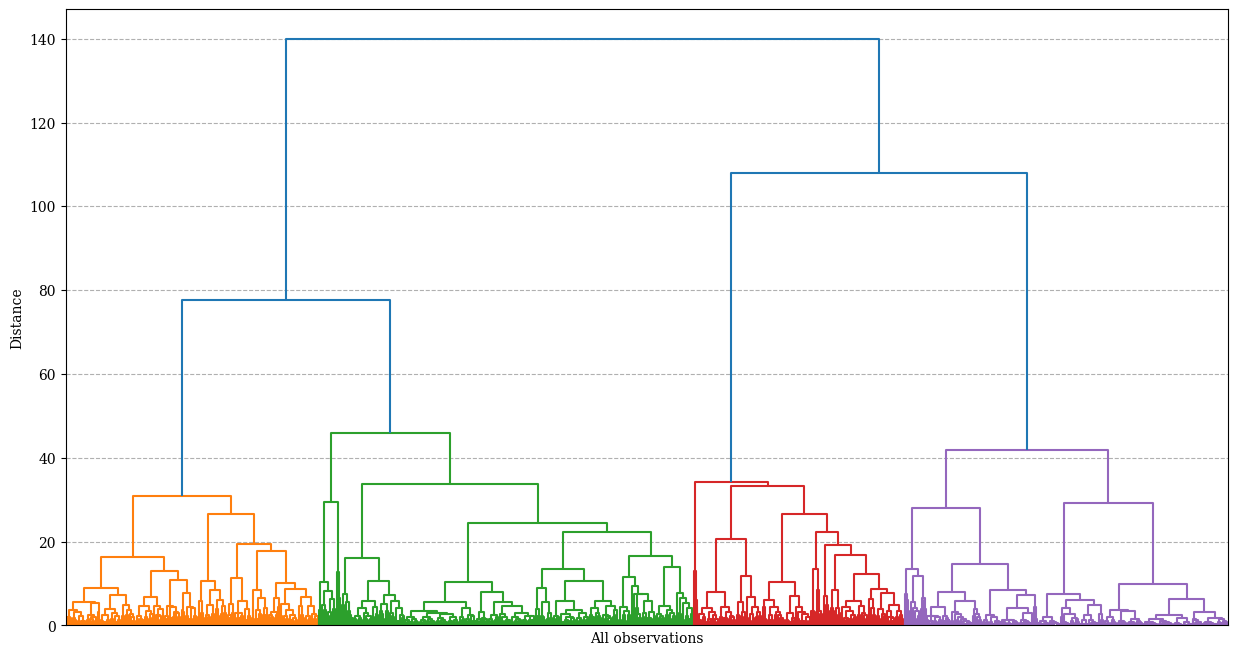

In [12]:
gv.dendogram(x_std, method='ward')

# Elbow plot using KMeans Inertia

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

c:\Users\gusta\ml_course_americas\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\gusta\ml_course_americas\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\gusta\ml_course_americas\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\gusta\ml_course_americas\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.wa

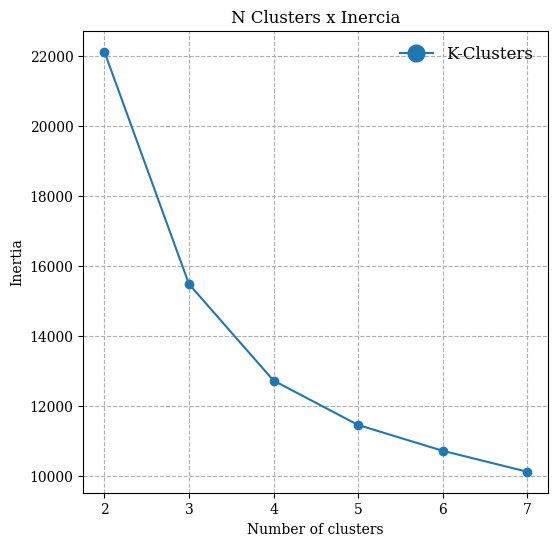

In [13]:
gv.elbow_plot(2, 8, x_std)

# KMeans: running the algorithm and understanding the parameters


https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [14]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, init="k-means++", n_init=300, random_state=1)

kmeans.fit(x_std)
data.loc[data0.index, "kmeans_5k"] = kmeans.labels_

# Visualize clusters

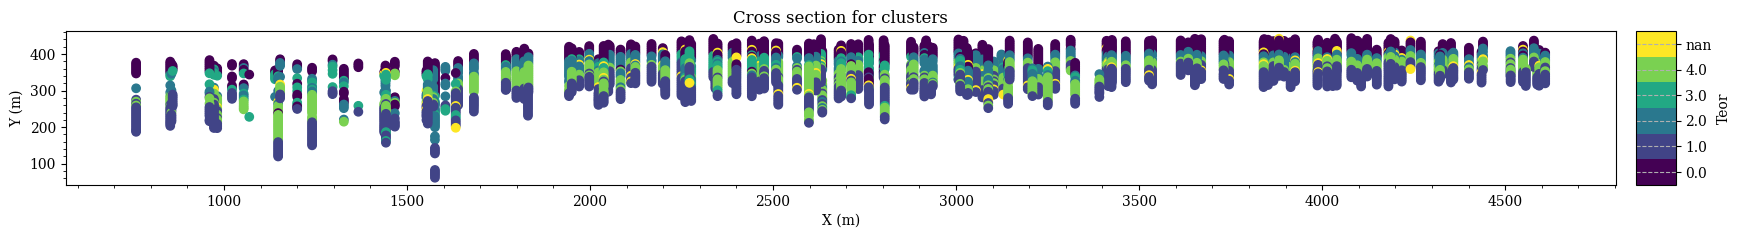

In [15]:
gv.locmap(data['X'], data['Z'], data['kmeans_5k'], cat=True,
           figsize=(20,10), title='Cross section for clusters')

## Hierarchichal Agglomerative: running the algorithm and understanding the parameters

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

In [16]:
from sklearn.cluster import AgglomerativeClustering


aggl = AgglomerativeClustering(
    n_clusters=5, 
    affinity='euclidean', 
    linkage='ward',
    )


aggl.fit(x_std)  


data.loc[data0.index, 'aggl_5k'] = kmeans.labels_

c:\Users\gusta\ml_course_americas\.venv\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


# Visualize clusters

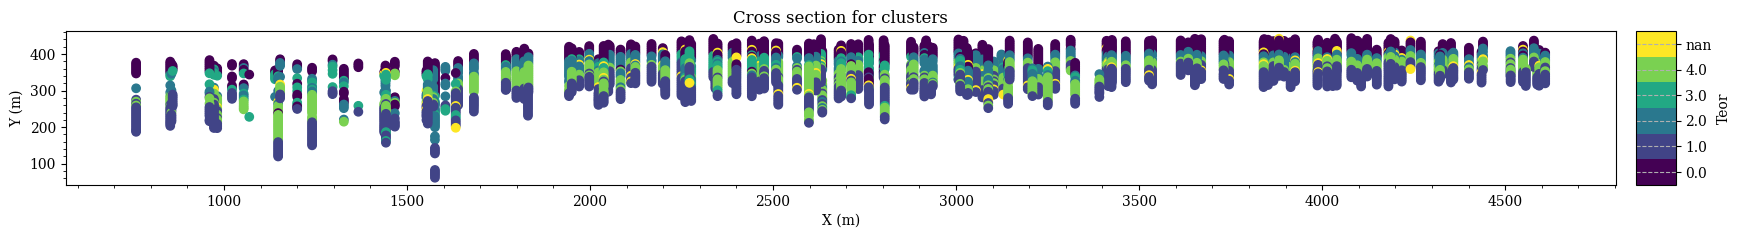

In [17]:
gv.locmap(data['X'], data['Z'], data['aggl_5k'], cat=True,
           figsize=(20,10), title='Cross section for clusters')

# Generating different scenarios with KMeans and Agglomerative: calculating performance metrics

In [18]:
from sklearn.metrics import davies_bouldin_score, silhouette_score

# Create empty lists to store the Davies-Bouldin and Silhouette scores for KMeans and Agglomerative clustering.

db_km = []
sl_km = []

sl_ag = []
db_ag = []

# Define the range of cluster numbers to evaluate. In this example, the min and max cluster numbers are defined beforehand, and np.arange() is used to create an array of cluster numbers to evaluate.
min = 2
max = 7

n_clus = np.arange(min, max, 1)

# Loop through each cluster number in the n_clus array.

for i in n_clus:
    # Run KMeans clustering for the current number of clusters, and append the resulting labels to the data DataFrame, with the column name kmeans_{i}k.
    print(f"Running KMeans for {i}clusters...")
    cluster = KMeans(n_clusters=i, algorithm="full")
    cluster.fit(x_std)
    labels_km = cluster.labels_
    data.loc[data0.index, f"kmeans_{i}k"] = labels_km

    # Calculate the Silhouette and Davies-Bouldin scores for the KMeans clustering, and append them to the corresponding lists.
    sl_km.append(silhouette_score(x_std, labels_km))
    db_km.append(davies_bouldin_score(x_std, labels_km))

    # Run Agglomerative clustering for the current number of clusters, and append the resulting labels to the data DataFrame, with the column name aggl_{i}k.
    print(f"Running Agglomerative for {i}clusters...")
    aggl = AgglomerativeClustering(n_clusters=i, affinity="euclidean", linkage="ward")
    aggl.fit(x_std)
    labels_ag = aggl.labels_
    data.loc[data0.index, f"aggl_{i}k"] = labels_ag

    # Calculate the Silhouette and Davies-Bouldin scores for the Agglomerative clustering, and append them to the corresponding lists.
    sl_ag.append(silhouette_score(x_std, labels_ag))
    db_ag.append(davies_bouldin_score(x_std, labels_ag))


print(
    "Ready, the clusters were calculated and inserted in your dataframe and the metrics were accumulated in the lists!"
)


Running KMeans for 2clusters...


c:\Users\gusta\ml_course_americas\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\gusta\ml_course_americas\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


Running Agglomerative for 2clusters...


c:\Users\gusta\ml_course_americas\.venv\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Running KMeans for 3clusters...


c:\Users\gusta\ml_course_americas\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\gusta\ml_course_americas\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


Running Agglomerative for 3clusters...


c:\Users\gusta\ml_course_americas\.venv\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Running KMeans for 4clusters...


c:\Users\gusta\ml_course_americas\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\gusta\ml_course_americas\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


Running Agglomerative for 4clusters...


c:\Users\gusta\ml_course_americas\.venv\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Running KMeans for 5clusters...


c:\Users\gusta\ml_course_americas\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\gusta\ml_course_americas\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


Running Agglomerative for 5clusters...


c:\Users\gusta\ml_course_americas\.venv\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Running KMeans for 6clusters...


c:\Users\gusta\ml_course_americas\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\gusta\ml_course_americas\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


Running Agglomerative for 6clusters...


c:\Users\gusta\ml_course_americas\.venv\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Ready, the clusters were calculated and inserted in your dataframe and the metrics were accumulated in the lists!


# Plotting metrics for scenario analysis

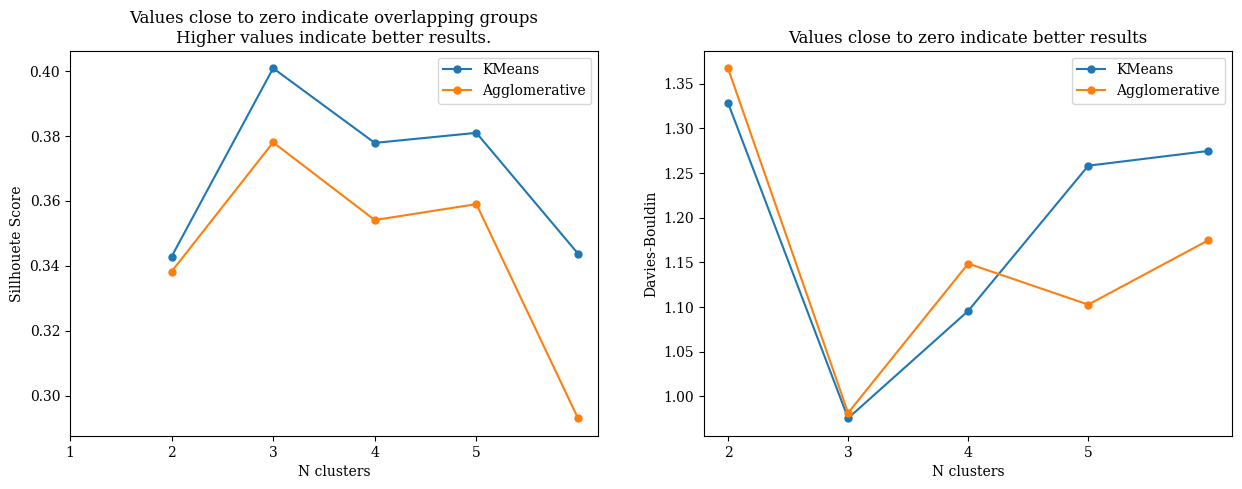

In [19]:
gv.cluster_metrics(n_clus, sl_km, sl_ag, db_km, db_ag)

# Comparative plots

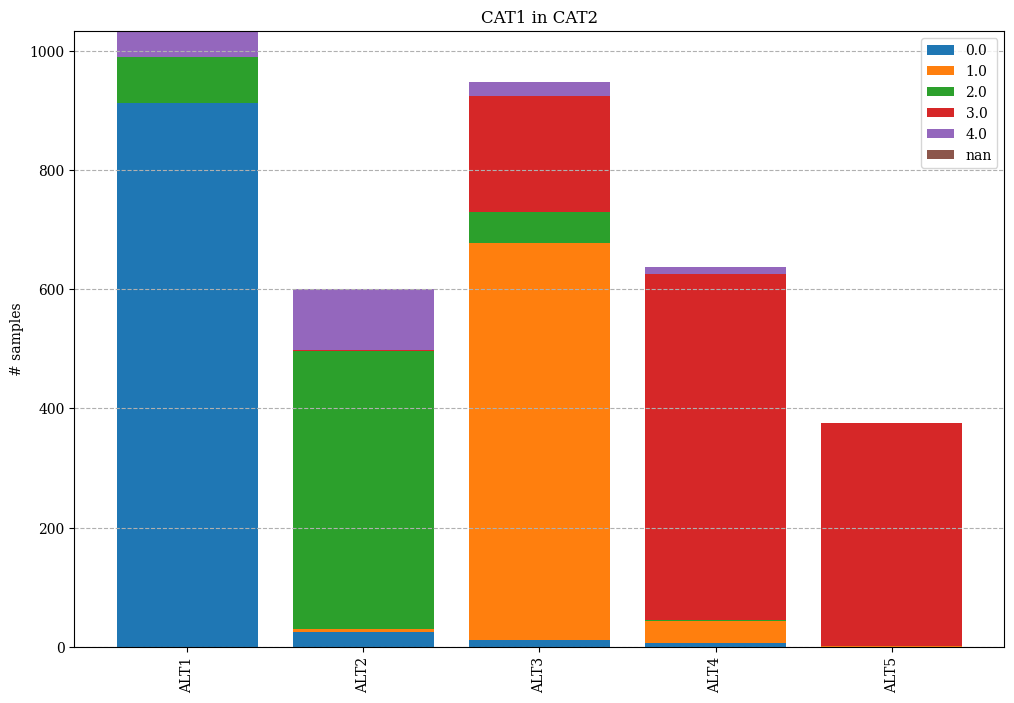

In [20]:
gv.cat1_in_cat2(data['ALT'], data['kmeans_5k'], title="CAT1 in CAT2")

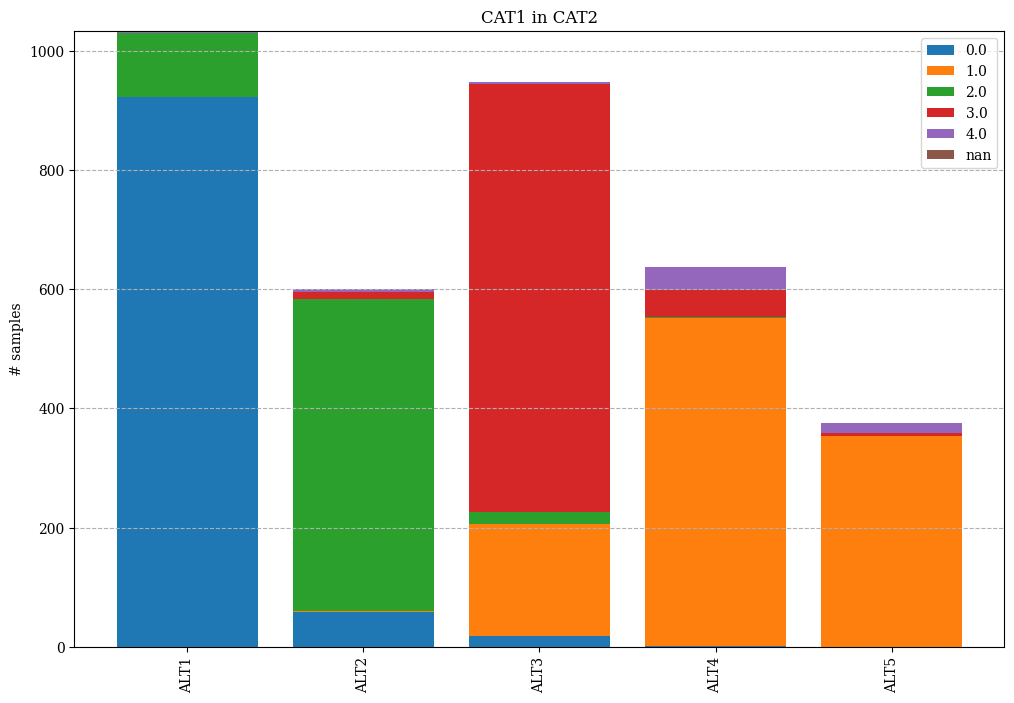

In [21]:
gv.cat1_in_cat2(data['ALT'], data['aggl_5k'], title="CAT1 in CAT2")

# Understanding clusters distributions for each variable with boxplots

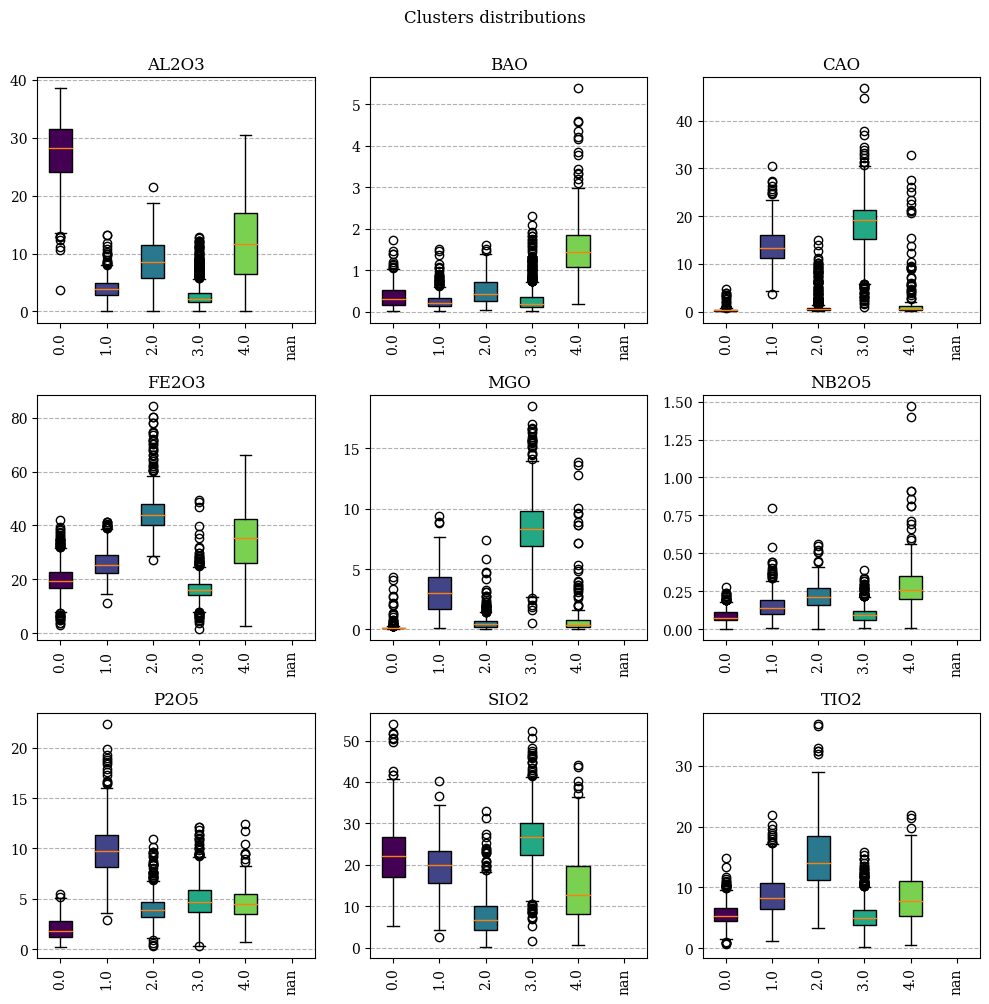

In [22]:
gv.boxplots(data[variables], variables, data['kmeans_5k'], 'Clusters distributions')

# Download data clustered for supervised learning!

In [23]:
data.to_csv('phosphate_assay_sampled_geomet_clustered.csv', index=False)

if 'google.colab' in str(get_ipython()):
  from google.colab import files
  files.download("phosphate_assay_sampled_geomet_clustered.csv")

# Practice

In this exercise, you will reproduce the clustering process presented in the notebook, but with a new set of variables that will be defined based on their correlations. 

Remember: a good correlation coefficient is expected to lead to meaningful clustering results.




Generate a scatter matrix and a correlation matrix to understand the distributions and correlations of the variables.


In [24]:
## code

Define a new set of variables to be used in the cluster analysis based on their correlations.




In [25]:
## code

Preprocess the data by applying standardization with **StandardScaler()**.


In [26]:
## code   

Reproduce the clustering process from the preprocessing step to the final analyses:

Plot gv.elbow plot() and **gv.dendrogram()** to analyze the results.



In [27]:
## code

Generate different scenarios with the same script provided, changing only the number of desired groups.

In [28]:
## code

Plot the performance metrics through the cluster metrics with **gv.clustermetrics()**, horizontal sections with **gv.locmap()**, and visualize the distributions with **gv.boxplots()**.

In [29]:
## code

In [30]:
## code

In [31]:
## code